In [1]:
#### This is the code for project2 part II make my own question
#### analyze relation between saturation fraction and massflux of 5m/s wind shear run
## import module needed
import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  type plt.$COMMAND
import numpy as np   # basic math library type np.$STUFF 
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy
from scipy import stats
import statsmodels.api as sm

In [2]:
### Read in the data
filename='homework2_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,SaFra,MF6
0,0.804019,0.026661
1,0.820884,0.042538
2,0.808491,0.036720
3,0.846140,0.089830
4,0.838313,0.060178


In [3]:
SaFra=data['SaFra']
MF6=data['MF6']
Time=np.arange(0,np.size(SaFra),1)
SampleN=np.size(SaFra)
print('Sample size:', SampleN)

Sample size: 54


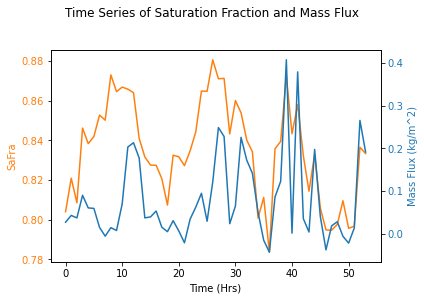

In [4]:
## Q(a) plot raw data as line plot and scatter plot
# line plot
fig1, ax1 = plt.subplots()
plt.suptitle('Time Series of Saturation Fraction and Mass Flux',y=1.03)

color = 'tab:orange'
ax1.set_xlabel('Time (Hrs)')
ax1.set_ylabel('SaFra', color=color)
ax1.plot(Time, SaFra, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mass Flux (kg/m^2)', color=color)  # we already handled the x-label with ax1
ax2.plot(Time, MF6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Text(0.5, 1.0, 'Satration Fraction vs. Mass Flux')

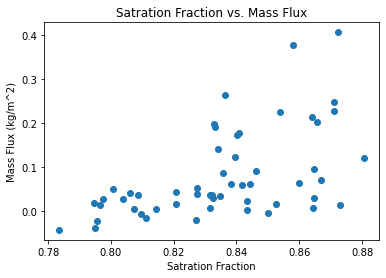

In [5]:
## scatter plot
plt.scatter(SaFra,MF6)
plt.xlabel('Satration Fraction')
plt.ylabel('Mass Flux (kg/m^2)')
plt.title('Satration Fraction vs. Mass Flux')

In [6]:
#### Q(b) detrend data
from scipy import signal
SaFraD=scipy.signal.detrend(SaFra)
MF6D=scipy.signal.detrend(MF6)


#### standardize data
SaFraMean=np.mean(SaFraD)
SaFraStd=np.std(SaFraD)
Stand_SaFraD=(SaFraD-SaFraMean)/SaFraStd
MF6Mean=np.mean(MF6D)
MF6Std=np.std(MF6D)
Stand_MF6D=(MF6D-MF6Mean)/MF6Std


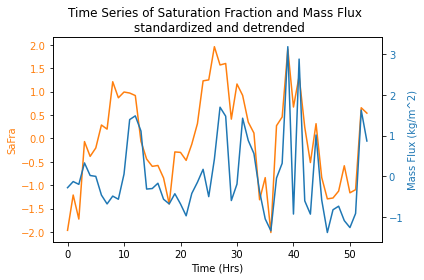

Text(0.5, 1.0, 'Satration Fraction vs. Mass Flux \n standardized and detrended')

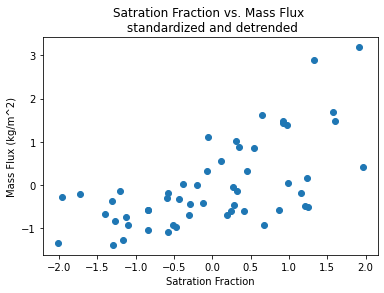

In [7]:
#### plot standardized and detrended data
# line plot
fig2, ax1 = plt.subplots()
plt.title('Time Series of Saturation Fraction and Mass Flux \n standardized and detrended')

color = 'tab:orange'
ax1.set_xlabel('Time (Hrs)')
ax1.set_ylabel('SaFra', color=color)
ax1.plot(Time, Stand_SaFraD, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mass Flux (kg/m^2)', color=color)  
ax2.plot(Time, Stand_MF6D, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout() 
plt.show()

# scatter plot
plt.scatter(Stand_SaFraD,Stand_MF6D)
plt.xlabel('Satration Fraction')
plt.ylabel('Mass Flux (kg/m^2)')
plt.title('Satration Fraction vs. Mass Flux \n standardized and detrended')


In [8]:
### check standardizing
print(round(np.mean(Stand_SaFraD),2))
print(round(np.std(Stand_SaFraD),2))
print(round(np.mean(Stand_MF6D),2))
print(round(np.std(Stand_MF6D),2))

0.0
1.0
0.0
1.0


In [9]:
#### Q(c) autocorrelation for SaFra and MF6, becasue they are standardized, mean=0, std=1
lag=1
t1_SaFra=Stand_SaFraD[0:-1*lag]
t2_SaFra=Stand_SaFraD[lag:]

AR_SaFra=np.dot(t1_SaFra,t2_SaFra)/(SampleN-lag) ## Barnes Chapter 2 Eq. 68 divided by the variance
print('autocorrelation of SaFra:',round(AR_SaFra,2))

t1_MF6=Stand_MF6D[0:-1*lag]
t2_MF6=Stand_MF6D[lag:]

AR_MF6=np.dot(t1_MF6,t2_MF6)/(SampleN-lag) ## Barnes Chapter 2 Eq. 68 divided by the variance
print('autocorrelation of MF6:',round(AR_MF6,2))

autocorrelation of SaFra: 0.67
autocorrelation of MF6: 0.2


In [10]:
#### effective sample size for SaFra and MF6
EFSize_SaFra=SampleN*(1-AR_SaFra)/(1+AR_SaFra)
print('effective sample size of SaFra:',round(EFSize_SaFra))
EFSize_MF6=SampleN*(1-AR_MF6)/(1+AR_MF6)
print('effective sample size of MF6:',round(EFSize_MF6))

effective sample size of SaFra: 11
effective sample size of MF6: 36


correlation coefficent =  0.64
percent variance explained:  41.1 %
line equation: MF= 0.64 *SaFra + 0.0


Text(0.5, 1.0, 'Regression of Satration Fraction vs. Mass Flux \n standardized and detrended')

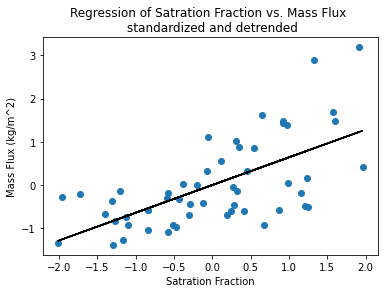

In [11]:
## Q(d) regression
slope, intercept, r_value, p_value, std_err = stats.linregress(Stand_SaFraD,Stand_MF6D)
print('correlation coefficent = ',round(r_value,2))
print('percent variance explained: ', round(r_value*r_value*100,2),'%')
print('line equation: MF=',round(slope,2),'*SaFra +',round(intercept,4))
## plot
plt.scatter(Stand_SaFraD,Stand_MF6D)
plt.plot(Stand_SaFraD,slope*Stand_SaFraD+intercept,'k')
plt.xlabel('Satration Fraction')
plt.ylabel('Mass Flux (kg/m^2)')
plt.title('Regression of Satration Fraction vs. Mass Flux \n standardized and detrended')

In [68]:
## Fisher-Z
## Calculate the Fisher-Z Transformation standard deviation Barnes Ch. 2 Equation 53
mu_Z=0.5*np.log((1+r_value)/(1-r_value)) 
df=round(EFSize_SaFra-3)
print('df=',df)
sigma_Z=1/np.sqrt(df) 

tstat95=stats.t.ppf(0.975,df) #two-sided
print('tc=',round(tstat95,2))
## Calculate the confidence intervals on the mean (mu_Z)
Zmin=mu_Z-tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
Zmax=mu_Z+tstat95*sigma_Z ## Barnes Ch. 2 Equation 54

## Convert to give a confidence interval on the correlation using Barnes Ch. 2 Eq. 55
rho_min=np.tanh(Zmin)
rho_max=np.tanh(Zmax)
print('Rhomin (minimum 95% confidence interval for r_value):',round(rho_min,2))
print('Rhomax (maximum 95% confidence interval for r_value):',round(rho_max,2))


df= 8
tc= 2.31
Rhomin (minimum 95% confidence interval for r_value): -0.06
Rhomax (maximum 95% confidence interval for r_value): 0.92


In [65]:
#### (e) Granger Causality Barnes' note CH2 EQ 199&121
## Calculate R for restricted and untrestricted models
##Restricted model: predicts Y using the past of Y
##Unrestricted model: predicts Y using the past of Y and X
def bivariate_granger_causality(var_y, var_x, q):
    def create_restricted_unrestricted_models():      
        time_series_len = len(var_y)
        restricted_model_predictors = np.empty((time_series_len-q,q))
        unrestricted_model_predictors = np.empty((time_series_len-q,q*2))

        # lagged slice of vary_y used for the restricted model
        for i in range(q):
            restricted_model_predictors[:,q-i-1] = var_y[q-i-1:time_series_len-i-1]

        # lagged slice of vary_x and vary_y used for the unrestricted model    
        for i in range(q):
            unrestricted_model_predictors[:,q-i-1] = var_y[q-i-1:time_series_len-i-1]
            unrestricted_model_predictors[:,2*q-i-1] = var_x[q-i-1:time_series_len-i-1]

        predictand = var_y[q:time_series_len] # variable to be predicted, original vary_y cut to the right length

        # stack a column of ones to calculate model intercept
        restricted_model_predictors = np.hstack((np.ones((time_series_len-q,1)),restricted_model_predictors)) 
        unrestricted_model_predictors = np.hstack((np.ones((time_series_len-q,1)),unrestricted_model_predictors))

        # fit the restricted and unrestricted linear regression models using ordinary least squares approach
        reg_restricted =  sm.OLS(predictand,restricted_model_predictors).fit()
        reg_unrestricted = sm.OLS(predictand,unrestricted_model_predictors).fit()
        return reg_restricted, reg_unrestricted, predictand, restricted_model_predictors, unrestricted_model_predictors
        

    reg_restricted, reg_unrestricted, predictand, restricted_model_predictors,unrestricted_model_predictors = create_restricted_unrestricted_models()               
    return reg_restricted, reg_unrestricted

In [67]:
## set up and run Granger Causality
max_lags = 14 # maximum number of lags
reg_restricted, reg_unrestricted= bivariate_granger_causality(var_y = Stand_MF6D,var_x = Stand_SaFraD,q = max_lags)

# print result
RY=np.sqrt(reg_restricted.rsquared)
RXY=np.sqrt(reg_unrestricted.rsquared)
print('total lag used:',max_lags)
print('R predicted only by Y:', round(RY,4))
print('variance explained:',round(RY*RY*100,2),'%')
print('R predicted by X and Y:', round(RXY,4))
print('variance explained:',round(RXY*RXY*100,2),'%')

total lag used: 14
R predicted only by Y: 0.5033
variance explained: 25.33 %
R predicted by X and Y: 0.8602
variance explained: 74.0 %


In [72]:
## calculation confidence interval using Fisher-Z Barnes Ch. 2 Equation 53
df=round(EFSize_SaFra-3)
sigma_Z=1/np.sqrt(df) 
tstat95=stats.t.ppf(0.975,df) #two-sided
print('tc=',round(tstat95,2))
## Calculate the confidence intervals
mu_ZY=0.5*np.log((1+RY)/(1-RY)) 
ZminY=mu_ZY-tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
ZmaxY=mu_ZY+tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
mu_ZXY=0.5*np.log((1+RXY)/(1-RXY)) 
ZminXY=mu_ZXY-tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
ZmaxXY=mu_ZXY+tstat95*sigma_Z ## Barnes Ch. 2 Equation 54
## Convert to give a confidence interval on the correlation using Barnes Ch. 2 Eq. 55
rho_minY=np.tanh(ZminY)
rho_maxY=np.tanh(ZmaxY)
rho_minXY=np.tanh(ZminXY)
rho_maxXY=np.tanh(ZmaxXY)
print('95% confidence interval predicted with Y only: [',round(rho_minY,2),',',round(rho_maxY,2),']')
print('95% confidence interval predicted with X and Y: [',round(rho_minXY,2),',',round(rho_maxXY,2),']')

tc= 2.31
95% confidence interval predicted with Y only: [ -0.26 , 0.88 ]
95% confidence interval predicted with X and Y: [ 0.45 , 0.97 ]
